In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import koreanize_matplotlib
from matplotlib import rc
plt.rc('font',family='malgun gothic')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
# 데이터 파일 로드
df = pd.read_parquet("mini3_data/nov_customer.gzip")
df

,event_time,event_type,product_id,brand,price,user_id,대분류,소분류
index,,,,,,,,
635,2019-11-01 00:04:15 UTC,view,39800110,dion,29.60,516426931,apparel,shirt
788,2019-11-01 00:05:25 UTC,view,55000008,nike,111.95,516426931,apparel,costume
2704,2019-11-01 00:17:55 UTC,view,28718444,strobbs,64.61,549422045,apparel,shoes
2794,2019-11-01 00:18:29 UTC,view,28718445,strobbs,64.61,549422045,apparel,shoes
3104,2019-11-01 00:20:31 UTC,view,28715623,peak,82.34,549422045,apparel,shoes
...,...,...,...,...,...,...,...,...
67501843,2019-11-30 23:59:06 UTC,view,28718603,respect,89.84,553345124,apparel,shoes
67501860,2019-11-30 23:59:14 UTC,view,28719201,alpina,220.08,553345124,apparel,shoes
67501874,2019-11-30 23:59:18 UTC,view,28718603,respect,89.84,553345124,apparel,shoes


In [3]:
# event_type 별 컬럼 생성
df.loc[df['event_type'] == 'view', 'view'] = '1'
df.loc[df['event_type'] == 'cart', 'cart'] = '1'
df.loc[df['event_type'] == 'purchase', 'purchase'] = '1'
df = df.fillna(0)
df['view'] = df['view'].astype(int)
df['cart'] = df['cart'].astype(int)
df['purchase'] = df['purchase'].astype(int)
df

,event_time,event_type,product_id,brand,price,user_id,대분류,소분류,view,cart,purchase
index,,,,,,,,,,,
635,2019-11-01 00:04:15 UTC,view,39800110,dion,29.60,516426931,apparel,shirt,1,0,0
788,2019-11-01 00:05:25 UTC,view,55000008,nike,111.95,516426931,apparel,costume,1,0,0
2704,2019-11-01 00:17:55 UTC,view,28718444,strobbs,64.61,549422045,apparel,shoes,1,0,0
2794,2019-11-01 00:18:29 UTC,view,28718445,strobbs,64.61,549422045,apparel,shoes,1,0,0
3104,2019-11-01 00:20:31 UTC,view,28715623,peak,82.34,549422045,apparel,shoes,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
67501843,2019-11-30 23:59:06 UTC,view,28718603,respect,89.84,553345124,apparel,shoes,1,0,0
67501860,2019-11-30 23:59:14 UTC,view,28719201,alpina,220.08,553345124,apparel,shoes,1,0,0
67501874,2019-11-30 23:59:18 UTC,view,28718603,respect,89.84,553345124,apparel,shoes,1,0,0


In [5]:
# 유저, 상품별 그룹화
v_c_p = df.groupby(['user_id','product_id']).agg({'view':'sum','cart':'sum','purchase':'sum'})
v_c_p

view  cart  purchase
user_id   product_id                      
296197073 28711981       1     0         0
323651575 28708933       1     0         0
          28715776       1     0         0
          28719474       1     0         0
          43300096       1     0         0
...                    ...   ...       ...
579878997 62100014       1     0         0
579939531 43300164       1     0         0
          100020615      1     0         0
579939590 39900064       2     1         1
579953464 39700212       1     0         0

[370839 rows x 3 columns]

In [6]:
# apparel 항목의 로그 확인
# 기술통계값 -> 평균
# 구매가 0.031580 번 일어나기 위해서는 평균기준
# view는 1.575862 번
# cart는 0.066439 번 일어나야 한다. 

v_c_p.describe()

,view,cart,purchase
count,370839.000000,370839.000000,370839.000000
mean,1.575862,0.066439,0.031580
std,1.790495,0.513021,0.218664
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000
max,124.000000,71.000000,18.000000


In [59]:
# 수치 변환

# 평균적으로 apparel 모든 상품의 평균 구매에는
# 평균 40번의 view와
# 평균 0.002의 cart의 행태를 보임
# view 이후 cart에 담기 보다는 결정 했을때 바로 구매 행태

change = v_c_p.describe().copy()
(change.iloc[1] / 0.031580)

view        49.900626
cart         2.103817
purchase     0.999992
Name: mean, dtype: float64

In [60]:
# 유저별 제품별 실구매 로그 확인
real = v_c_p[v_c_p['purchase']!=0]
real

,,view,cart,purchase
user_id,product_id,,,
353600697,28722205,6,2,1
506255779,100012181,1,1,1
512168831,28719175,17,6,1
512363886,28500096,3,2,1
512364888,28705521,12,3,1
...,...,...,...,...
579664706,28722203,2,0,1
579744564,28718861,3,1,1
579828565,28716744,4,0,1


In [62]:
# apparel 실 구매자들은

# 평균적으로 1번의 구매에는
# 평균 5.16의 view와
# 평균 1.36의 cart의 행태를 보임
# view 이후 cart에 담기 보다는 결정 했을때 바로 구매 행태


real.describe()

,view,cart,purchase
count,10120.000000,10120.000000,10120.000000
mean,5.965613,1.564229,1.157213
std,5.663768,2.288990,0.670476
min,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000
75%,8.000000,2.000000,1.000000
max,124.000000,71.000000,18.000000


In [61]:
# 수치 변환
total_mean = real.describe().copy()
total_mean = (total_mean.iloc[1] / 1.157213)
total_mean

view        5.155155
cart        1.351721
purchase    1.000000
Name: mean, dtype: float64

# 소분류별 구매 행태 분석

In [11]:
df

,event_time,event_type,product_id,brand,price,user_id,대분류,소분류,view,cart,purchase
index,,,,,,,,,,,
635,2019-11-01 00:04:15 UTC,view,39800110,dion,29.60,516426931,apparel,shirt,1,0,0
788,2019-11-01 00:05:25 UTC,view,55000008,nike,111.95,516426931,apparel,costume,1,0,0
2704,2019-11-01 00:17:55 UTC,view,28718444,strobbs,64.61,549422045,apparel,shoes,1,0,0
2794,2019-11-01 00:18:29 UTC,view,28718445,strobbs,64.61,549422045,apparel,shoes,1,0,0
3104,2019-11-01 00:20:31 UTC,view,28715623,peak,82.34,549422045,apparel,shoes,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
67501843,2019-11-30 23:59:06 UTC,view,28718603,respect,89.84,553345124,apparel,shoes,1,0,0
67501860,2019-11-30 23:59:14 UTC,view,28719201,alpina,220.08,553345124,apparel,shoes,1,0,0
67501874,2019-11-30 23:59:18 UTC,view,28718603,respect,89.84,553345124,apparel,shoes,1,0,0


In [13]:
# 11월 apparel 품목 중 판매 순위 확인
# shoes > costume > dress 순
g_1 = df["소분류"].value_counts().copy()
g_1

shoes        545412
costume       17931
dress         13997
shirt         10513
underwear      9313
jumper         7662
tshirt         4646
jeans          3231
trousers       3129
skirt          1841
glove           916
scarf           892
belt            644
sock            507
shorts          106
Name: 소분류, dtype: int64

Text(0.5, 1.0, '11월 apparel 내 판매 수량')

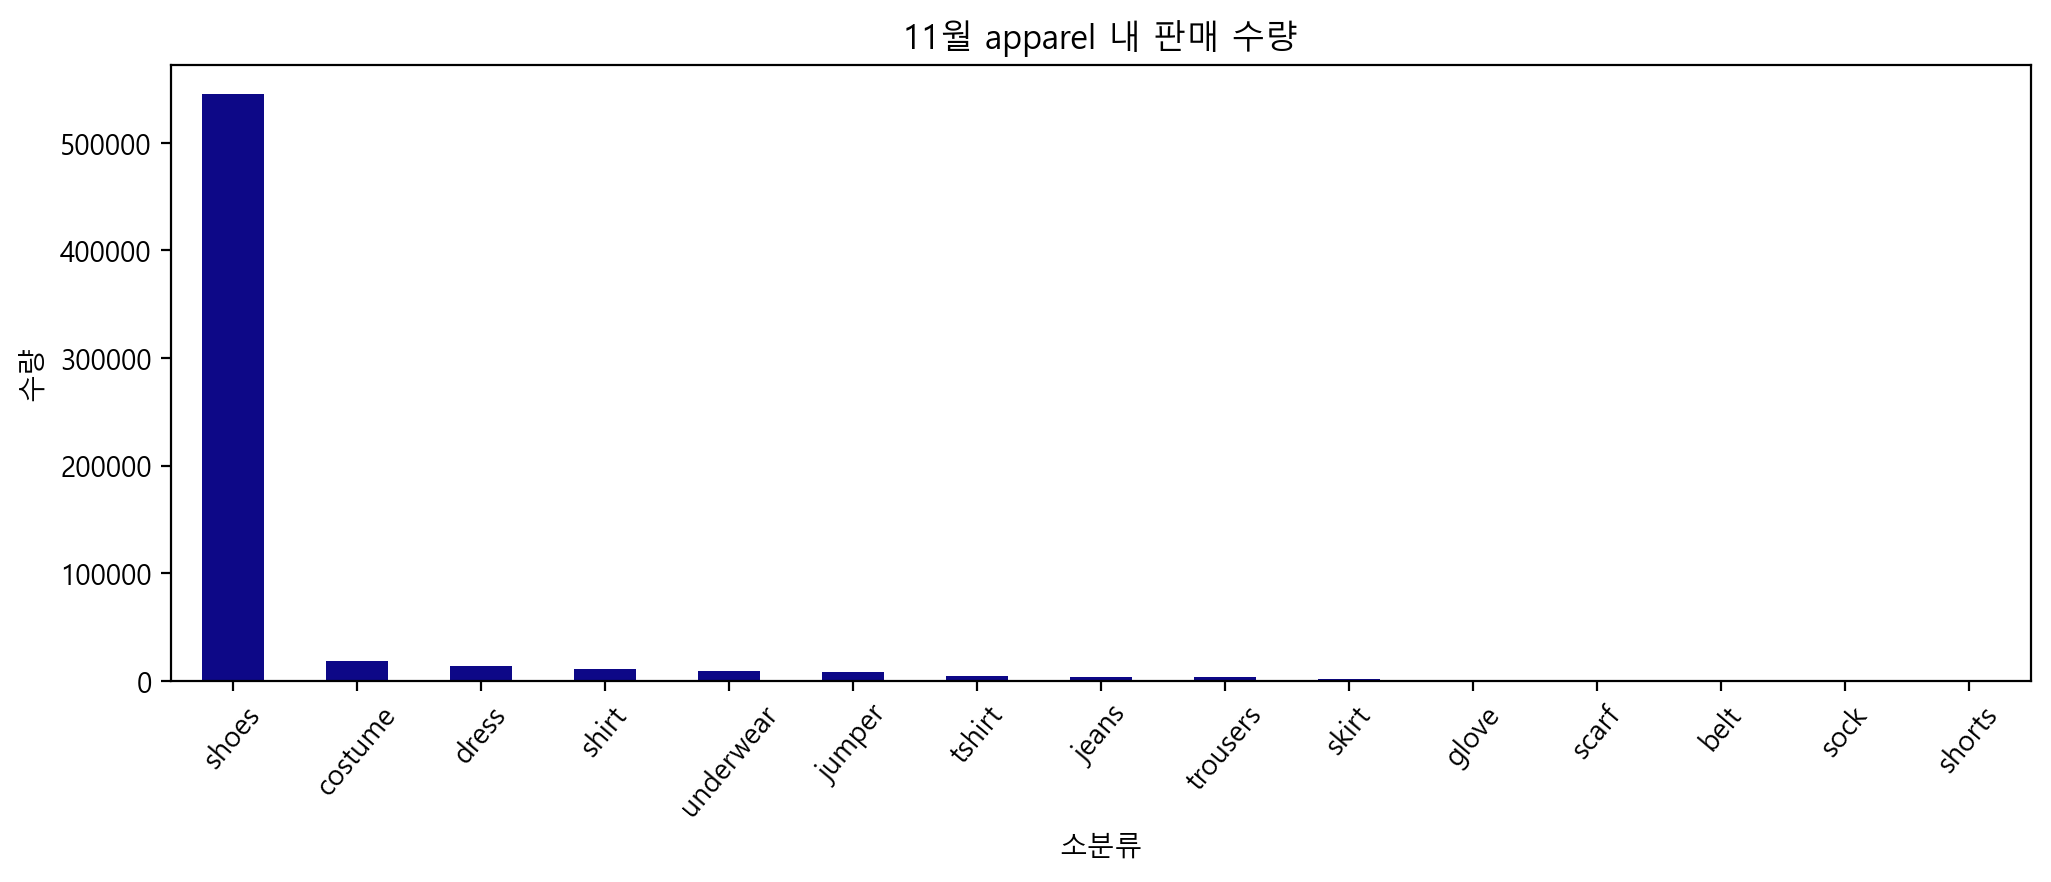

In [74]:
# pointplot 으로 시간대( InvoiceHour ) 구매 빈도수를 시각화합니다.
plt.figure(figsize=(12, 4))
g_1.plot(kind='bar', rot=50, cmap='plasma');
plt.xlabel("소분류")
plt.ylabel("수량")
plt.title("11월 apparel 내 판매 수량")

In [48]:
# 10월 top3 11월 동일 항목 비교
octnov_view = pd.DataFrame({'product' : ['shoes', 'underwear', 'costume', 'total'], 'view' : [shoes_mean[0], underwear_mean[0], costume_mean[0], total_mean[0]]})
octnov_view

,product,view
0,shoes,5.132158
1,underwear,2.861805
2,costume,3.494623
3,total,5.020152


#  10월 top3 동일항목 분석.
## 품목 shoes, underwear, costume

* 품목 shoes 분석 

In [12]:
shoes_data = df[df['소분류'] == 'shoes']
shoes_data

,event_time,event_type,product_id,brand,price,user_id,대분류,소분류,view,cart,purchase
index,,,,,,,,,,,
2704,2019-11-01 00:17:55 UTC,view,28718444,strobbs,64.61,549422045,apparel,shoes,1,0,0
2794,2019-11-01 00:18:29 UTC,view,28718445,strobbs,64.61,549422045,apparel,shoes,1,0,0
3104,2019-11-01 00:20:31 UTC,view,28715623,peak,82.34,549422045,apparel,shoes,1,0,0
3322,2019-11-01 00:22:01 UTC,view,28721826,nike,151.61,549422045,apparel,shoes,1,0,0
3415,2019-11-01 00:22:40 UTC,view,28716660,respect,44.79,561594136,apparel,shoes,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
67501843,2019-11-30 23:59:06 UTC,view,28718603,respect,89.84,553345124,apparel,shoes,1,0,0
67501860,2019-11-30 23:59:14 UTC,view,28719201,alpina,220.08,553345124,apparel,shoes,1,0,0
67501874,2019-11-30 23:59:18 UTC,view,28718603,respect,89.84,553345124,apparel,shoes,1,0,0


In [15]:
shoes_vcp = shoes_data.groupby(['user_id','product_id']).agg({'view':'sum','cart':'sum','purchase':'sum'})
shoes_vcp

view  cart  purchase
user_id   product_id                      
296197073 28711981       1     0         0
323651575 28708933       1     0         0
          28715776       1     0         0
          28719474       1     0         0
          45602487       1     0         0
...                    ...   ...       ...
579871977 28722151       1     0         0
          28722152       1     0         0
          100004192      1     0         0
          100012208      1     0         0
          100012266      2     0         0

[311845 rows x 3 columns]

In [16]:
shoes_vcp = shoes_vcp[shoes_vcp['purchase'] != 0]
shoes_vcp

view  cart  purchase
user_id   product_id                      
353600697 28722205       6     2         1
506255779 100012181      1     1         1
512168831 28719175      17     6         1
512364888 28705521      12     3         1
          100005407     12     1         1
...                    ...   ...       ...
579652603 28712834       2     1         1
579664706 28722203       2     0         1
579744564 28718861       3     1         1
579828565 28716744       4     0         1
579833547 28722152       2     1         1

[9366 rows x 3 columns]

In [17]:
# shoes 구매자들은
# 평균 1회 구매시
# 5.26번을 view하고 구매

shoes_vcp.describe()

,view,cart,purchase
count,9366.000000,9366.000000,9366.000000
mean,6.110506,1.595025,1.162396
std,5.763432,2.348698,0.679813
min,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000
75%,8.000000,2.000000,1.000000
max,124.000000,71.000000,18.000000


In [49]:
shoes_mean = shoes_vcp.describe().iloc[1] /  1.162396
shoes_mean

view        5.256820
cart        1.372187
purchase    1.000000
Name: mean, dtype: float64

In [19]:
# 소분류 분석 함수 생성

def analysis_category(i):
    i_data = df[df['소분류'] == i]
    i_vcp = i_data.groupby(['user_id','product_id']).agg({'view':'sum','cart':'sum','purchase':'sum'})
    i_vcp = i_vcp[i_vcp['purchase'] != 0]
    return i_vcp.describe()

* 품목 underwear 분석

In [46]:
i = 'underwear'
analysis_category(i)

,view,cart,purchase
count,79.000000,79.000000,79.000000
mean,3.265823,1.025316,1.037975
std,2.432203,0.800235,0.192356
min,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000
50%,3.000000,1.000000,1.000000
75%,4.000000,1.000000,1.000000
max,17.000000,4.000000,2.000000


In [50]:
underwear_mean = analysis_category('underwear').copy().iloc[1] /  1.037975
underwear_mean

view        3.146341
cart        0.987805
purchase    1.000000
Name: mean, dtype: float64

* 품목 costume 분석

In [22]:
i = 'costume'
analysis_category(i)

,view,cart,purchase
count,186.000000,186.000000,186.000000
mean,4.247312,1.220430,1.155914
std,4.178855,1.666786,0.839815
min,0.000000,0.000000,1.000000
25%,2.000000,0.000000,1.000000
50%,3.000000,1.000000,1.000000
75%,5.000000,1.000000,1.000000
max,34.000000,17.000000,11.000000


In [51]:
costume_mean = analysis_category('costume').copy().iloc[1] / 1.155914
costume_mean

view        3.674419
cart        1.055814
purchase    1.000000
Name: mean, dtype: float64

## 소분류 전체, shoes, underwear, costume 시간 비교

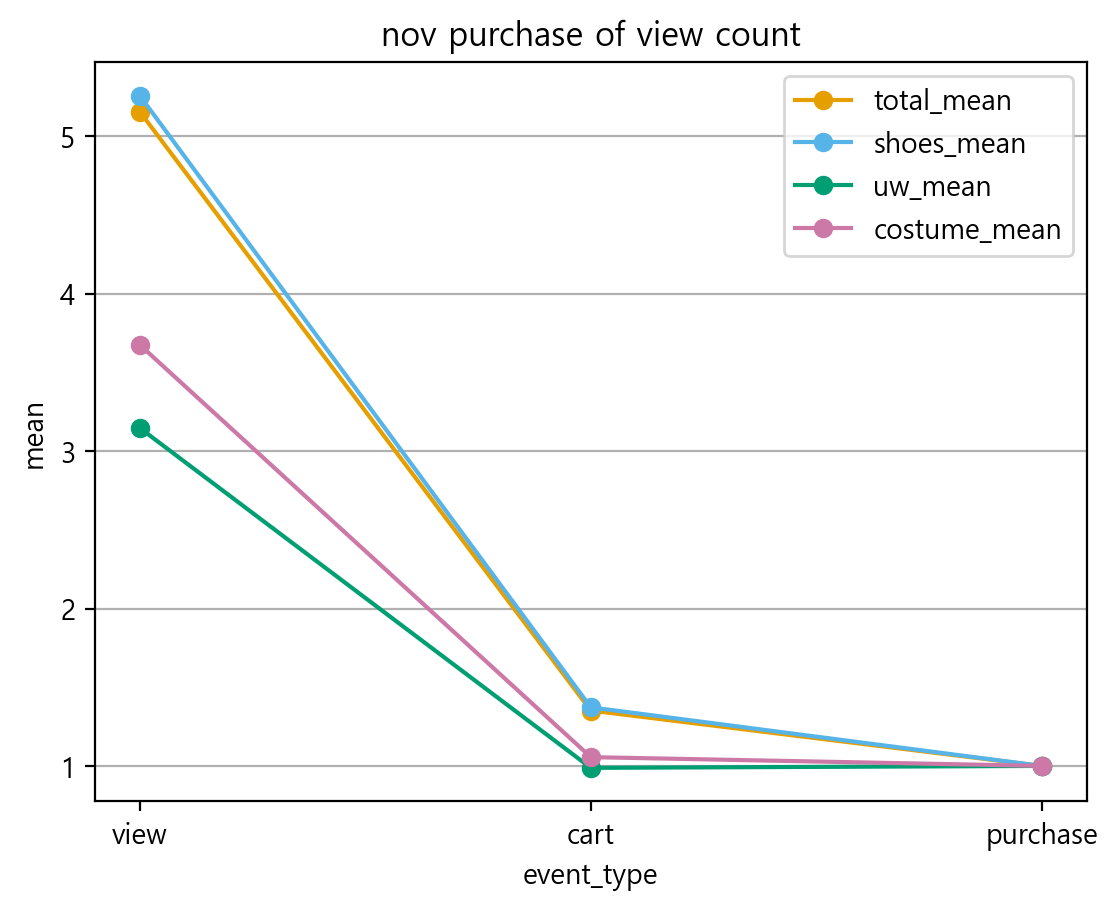

In [73]:
plt.plot(total_mean, color='#E69F00', marker='o', label="total_mean")
plt.plot(shoes_mean, color='#56B4E9',  marker='o', label="shoes_mean")
plt.plot(underwear_mean, color='#009E73', marker='o', label="uw_mean")
plt.plot(costume_mean, color='#CC79A7', marker='o', label="costume_mean")
plt.grid(True, axis='y')
plt.title('nov purchase of view count')
plt.xlabel('event_type')
plt.ylabel('mean')
plt.legend(bbox_to_anchor=(1, 1))

plt.show()

Text(0.5, 1.0, '11월 제품 구매 평균 view 수(10월 top3)')

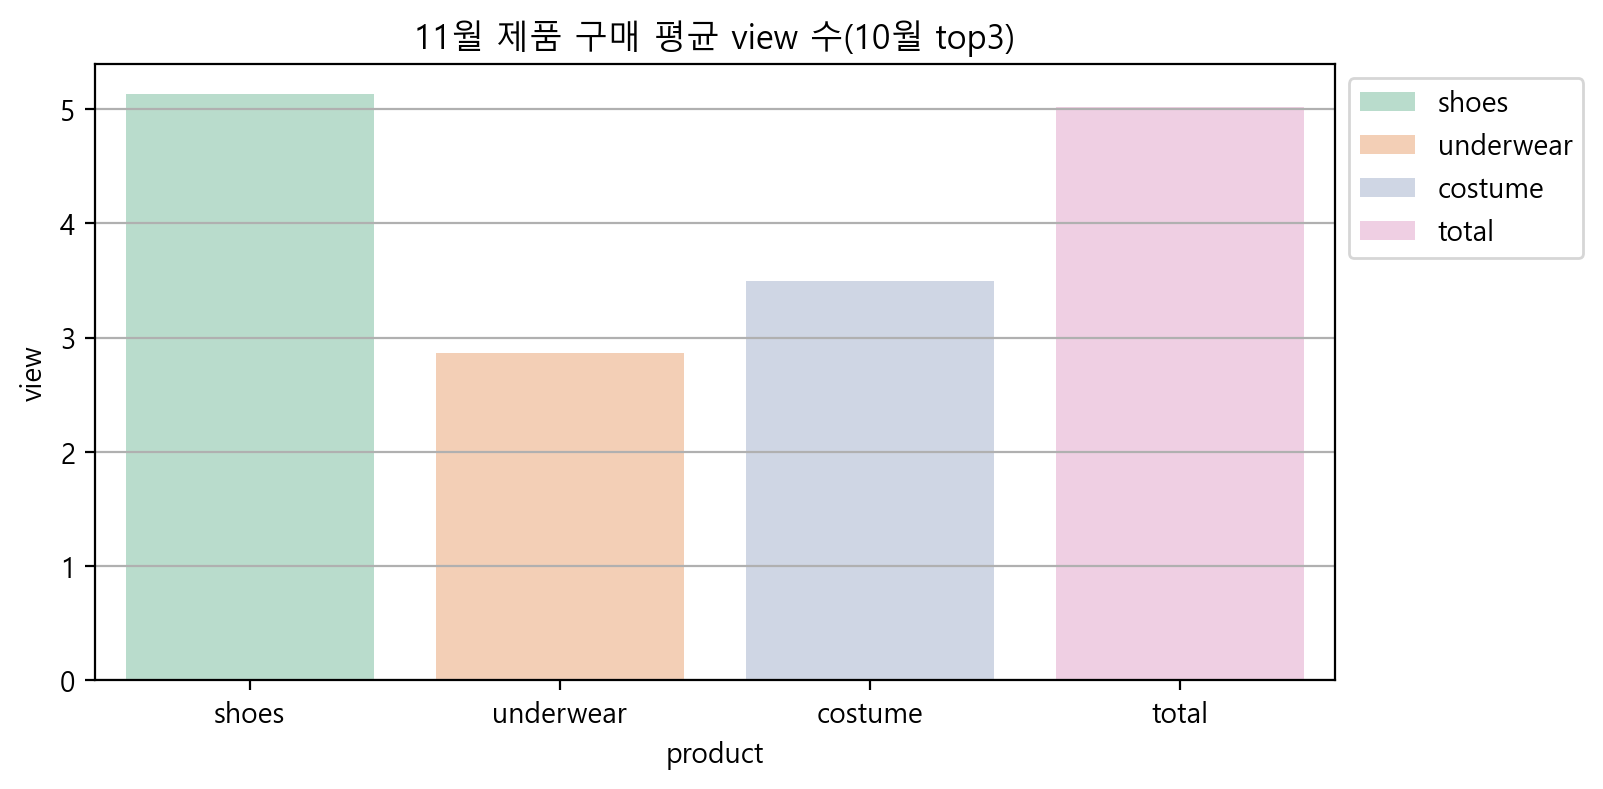

In [64]:
# view만 시각화
f, ax = plt.subplots(figsize=(8, 4))

sns.barplot(nov_view, x='product', y='view', palette="Pastel2", label=nov_view['product'])

ax.grid(True, axis='y')
ax.legend(bbox_to_anchor=(1, 1))
plt.title('11월 제품 구매 평균 view 수(10월 top3)')

#  11월 top3 동일항목 분석.

In [65]:
i = 'shoes'
analysis_category(i)

,view,cart,purchase
count,9366.000000,9366.000000,9366.000000
mean,6.110506,1.595025,1.162396
std,5.763432,2.348698,0.679813
min,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000
75%,8.000000,2.000000,1.000000
max,124.000000,71.000000,18.000000


In [69]:
shoes_mean = shoes_vcp.describe().iloc[1] /  1.162396
shoes_mean

view        5.256820
cart        1.372187
purchase    1.000000
Name: mean, dtype: float64

In [66]:
i = 'costume'
analysis_category(i)

,view,cart,purchase
count,186.000000,186.000000,186.000000
mean,4.247312,1.220430,1.155914
std,4.178855,1.666786,0.839815
min,0.000000,0.000000,1.000000
25%,2.000000,0.000000,1.000000
50%,3.000000,1.000000,1.000000
75%,5.000000,1.000000,1.000000
max,34.000000,17.000000,11.000000


In [70]:
costume_mean = analysis_category('costume').copy().iloc[1] / 1.155914
costume_mean

view        3.674419
cart        1.055814
purchase    1.000000
Name: mean, dtype: float64

In [67]:
i = 'dress'
analysis_category(i)

,view,cart,purchase
count,78.000000,78.000000,78.000000
mean,4.333333,0.948718,1.051282
std,3.846627,0.866362,0.222000
min,1.000000,0.000000,1.000000
25%,2.000000,0.000000,1.000000
50%,3.000000,1.000000,1.000000
75%,5.750000,1.000000,1.000000
max,19.000000,5.000000,2.000000


In [68]:
dress_mean = shoes_vcp.describe().iloc[1] /  1.051282
dress_mean

view        5.812433
cart        1.517219
purchase    1.105694
Name: mean, dtype: float64

In [71]:
# 11월 top3 항목 비교
nov_view = pd.DataFrame({'product' : ['shoes', 'costume', 'dress', 'total'], 'view' : [shoes_mean[0], costume_mean[0], dress_mean[0], total_mean[0]]})
nov_view

,product,view
0,shoes,5.256820
1,costume,3.674419
2,dress,5.812433
3,total,5.155155


Text(0.5, 1.0, '11월 제품 구매 평균 view 수')

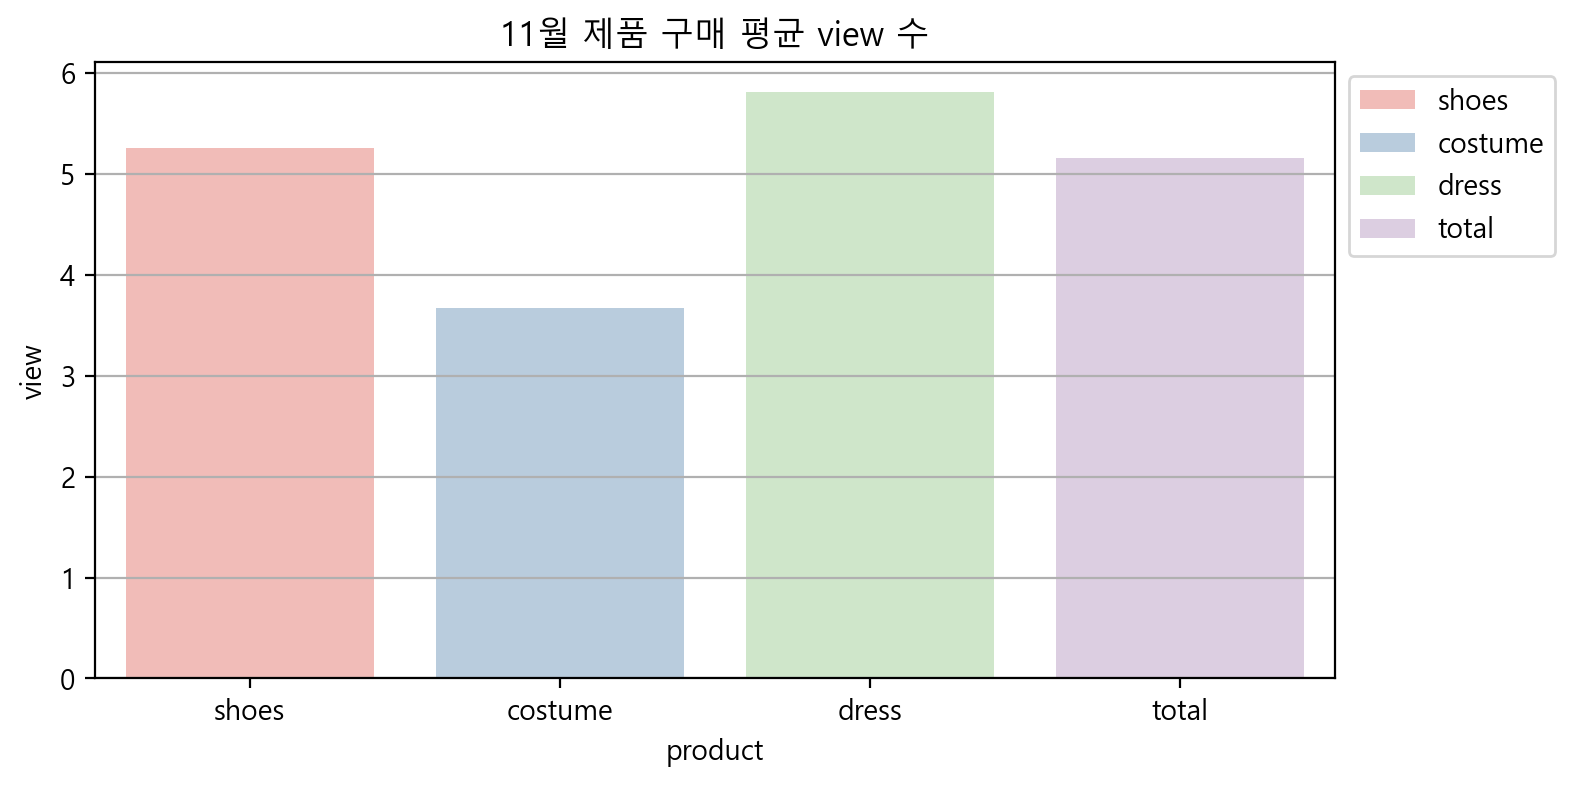

In [76]:
# view만 시각화
f, ax = plt.subplots(figsize=(8, 4))

sns.barplot(nov_view, x='product', y='view', palette="Pastel1", label=nov_view['product'])

ax.grid(True, axis='y')
ax.legend(bbox_to_anchor=(1, 1))
plt.title('11월 제품 구매 평균 view 수')

# RFM으로 분류한 그룹별 apparel 행태 분석

In [25]:
# rfm 데이터 로드
rfm = pd.read_csv("mini3_data/nov_rfm.csv")
rfm

,user_id,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_segmentation,RFM_score,RFM_class
0,353600697,11,1,88.03,2,4,2,242,8,silver
1,506255779,2,1,77.22,1,4,3,143,8,silver
2,512168831,5,1,127.42,1,4,1,141,6,silver
3,512364888,2,2,93.44,1,1,2,112,4,silver
4,512365577,24,1,71.82,4,4,4,444,12,platinum
...,...,...,...,...,...,...,...,...,...,...
7375,579664706,1,1,88.03,1,4,2,142,7,silver
7376,579744564,1,1,79.02,1,4,3,143,8,silver
7377,579828565,1,1,80.83,1,4,3,143,8,silver
7378,579833547,1,1,80.83,1,4,3,143,8,silver


In [26]:
# RFM 분석결과
# silver : 3378
# gold : 2739
# platinum : 1263

rfm.groupby("RFM_class").count()

,user_id,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_segmentation,RFM_score
RFM_class,,,,,,,,,
gold,2739,2739,2739,2739,2739,2739,2739,2739,2739
platinum,1263,1263,1263,1263,1263,1263,1263,1263,1263
silver,3378,3378,3378,3378,3378,3378,3378,3378,3378


In [27]:
# RFM_class 가 있는 user_id만 필터링

rfm_grade = rfm['user_id']
rfm_f = df.loc[df["user_id"].isin(rfm_grade)].copy()
rfm_f

,event_time,event_type,product_id,brand,price,user_id,대분류,소분류,view,cart,purchase
index,,,,,,,,,,,
2704,2019-11-01 00:17:55 UTC,view,28718444,strobbs,64.61,549422045,apparel,shoes,1,0,0
2794,2019-11-01 00:18:29 UTC,view,28718445,strobbs,64.61,549422045,apparel,shoes,1,0,0
3104,2019-11-01 00:20:31 UTC,view,28715623,peak,82.34,549422045,apparel,shoes,1,0,0
3322,2019-11-01 00:22:01 UTC,view,28721826,nike,151.61,549422045,apparel,shoes,1,0,0
3415,2019-11-01 00:22:40 UTC,view,28716660,respect,44.79,561594136,apparel,shoes,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
67501843,2019-11-30 23:59:06 UTC,view,28718603,respect,89.84,553345124,apparel,shoes,1,0,0
67501860,2019-11-30 23:59:14 UTC,view,28719201,alpina,220.08,553345124,apparel,shoes,1,0,0
67501874,2019-11-30 23:59:18 UTC,view,28718603,respect,89.84,553345124,apparel,shoes,1,0,0


In [29]:
# 데이터 병합

rfm_id = rfm[['user_id', 'RFM_class']]
df_grade = pd.merge(rfm_f, rfm_id, on=['user_id'])
df_grade

,event_time,event_type,product_id,brand,price,user_id,대분류,소분류,view,cart,purchase,RFM_class
0,2019-11-01 00:17:55 UTC,view,28718444,strobbs,64.61,549422045,apparel,shoes,1,0,0,platinum
1,2019-11-01 00:18:29 UTC,view,28718445,strobbs,64.61,549422045,apparel,shoes,1,0,0,platinum
2,2019-11-01 00:20:31 UTC,view,28715623,peak,82.34,549422045,apparel,shoes,1,0,0,platinum
3,2019-11-01 00:22:01 UTC,view,28721826,nike,151.61,549422045,apparel,shoes,1,0,0,platinum
4,2019-11-01 00:25:34 UTC,view,28718444,strobbs,64.61,549422045,apparel,shoes,1,0,0,platinum
...,...,...,...,...,...,...,...,...,...,...,...,...
334378,2019-11-30 18:36:19 UTC,view,28722152,respect,80.83,579833547,apparel,shoes,1,0,0,silver
334379,2019-11-30 22:16:28 UTC,view,39900064,daneildesch,42.47,579939590,apparel,trousers,1,0,0,gold
334380,2019-11-30 22:16:55 UTC,cart,39900064,daneildesch,42.47,579939590,apparel,trousers,0,1,0,gold
334381,2019-11-30 22:18:31 UTC,purchase,39900064,daneildesch,42.47,579939590,apparel,trousers,0,0,1,gold


In [30]:
df_grade["RFM_class"].value_counts()

silver      205572
gold         96466
platinum     32345
Name: RFM_class, dtype: int64

In [31]:
# 등급별 구매 행태 분석 함수 생성

def analysis_grade(i):
    data_i = df_grade[df_grade['RFM_class'] == i]
    i_vcp = data_i.groupby(['user_id','product_id']).agg({'view':'sum','cart':'sum','purchase':'sum'})
    i_vcp = i_vcp[i_vcp['purchase'] != 0]
    return i_vcp.describe()

In [32]:
# silver 등급 구매 이력 확인

i = 'silver'
analysis_grade(i)

,view,cart,purchase
count,5518.000000,5518.000000,5518.000000
mean,6.634288,1.822218,1.277274
std,6.201411,2.746052,0.876223
min,0.000000,0.000000,1.000000
25%,3.000000,1.000000,1.000000
50%,5.000000,1.000000,1.000000
75%,9.000000,2.000000,1.000000
max,124.000000,71.000000,18.000000


In [33]:
# gold 등급 구매 이력 확인

i = 'gold'
analysis_grade(i)

,view,cart,purchase
count,2786.000000,2786.000000,2786.000000
mean,5.359655,1.434673,1.003230
std,5.069061,1.641977,0.078062
min,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000
75%,7.000000,2.000000,1.000000
max,53.000000,29.000000,4.000000


In [34]:
# platinum 등급 구매 이력 확인

i = 'platinum'
analysis_grade(i)

,view,cart,purchase
count,1277.000000,1277.000000,1277.0
mean,4.888019,0.835552,1.0
std,4.458533,1.235406,0.0
min,0.000000,0.000000,1.0
25%,2.000000,0.000000,1.0
50%,3.000000,1.000000,1.0
75%,6.000000,1.000000,1.0
max,43.000000,13.000000,1.0


In [53]:
# 수치 변환. 평균 1회 구매시 view, cart

silver_mean = analysis_grade('silver').copy().iloc[1] /  1.277274
gold_mean = analysis_grade('gold').copy().iloc[1] /  1.003230
platinum_mean = analysis_grade('platinum').copy().iloc[1] /  1.0

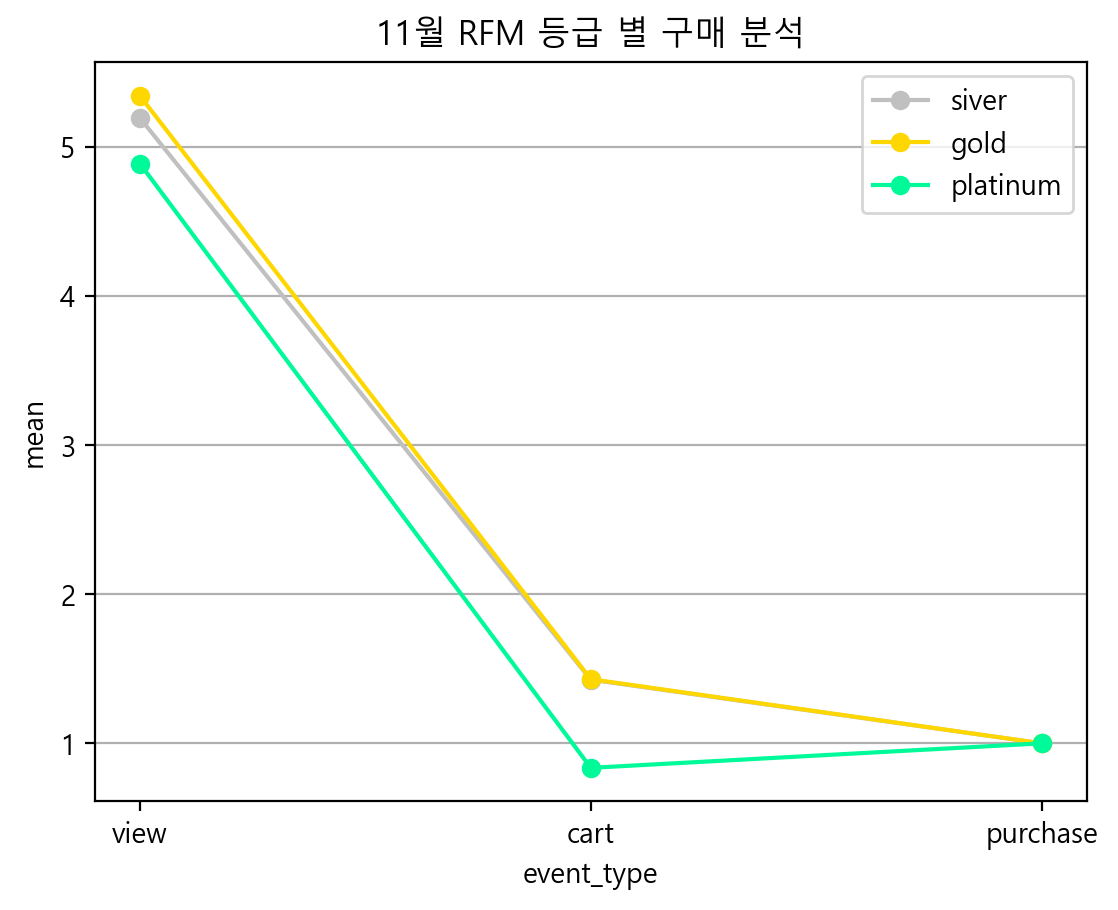

In [78]:
# 시각화

plt.plot(silver_mean, color='silver',  marker='o', label="siver")
plt.plot(gold_mean, color='gold', marker='o', label="gold")
plt.plot(platinum_mean, color='mediumspringgreen', marker='o', label="platinum")
plt.grid(True, axis='y')
plt.title('11월 RFM 등급 별 구매 분석')
plt.xlabel('event_type')
plt.ylabel('mean')
plt.legend(bbox_to_anchor=(1, 1))

plt.show()

Text(0.5, 1.0, '11월 고객 등급별 구매시 평균 view 수')

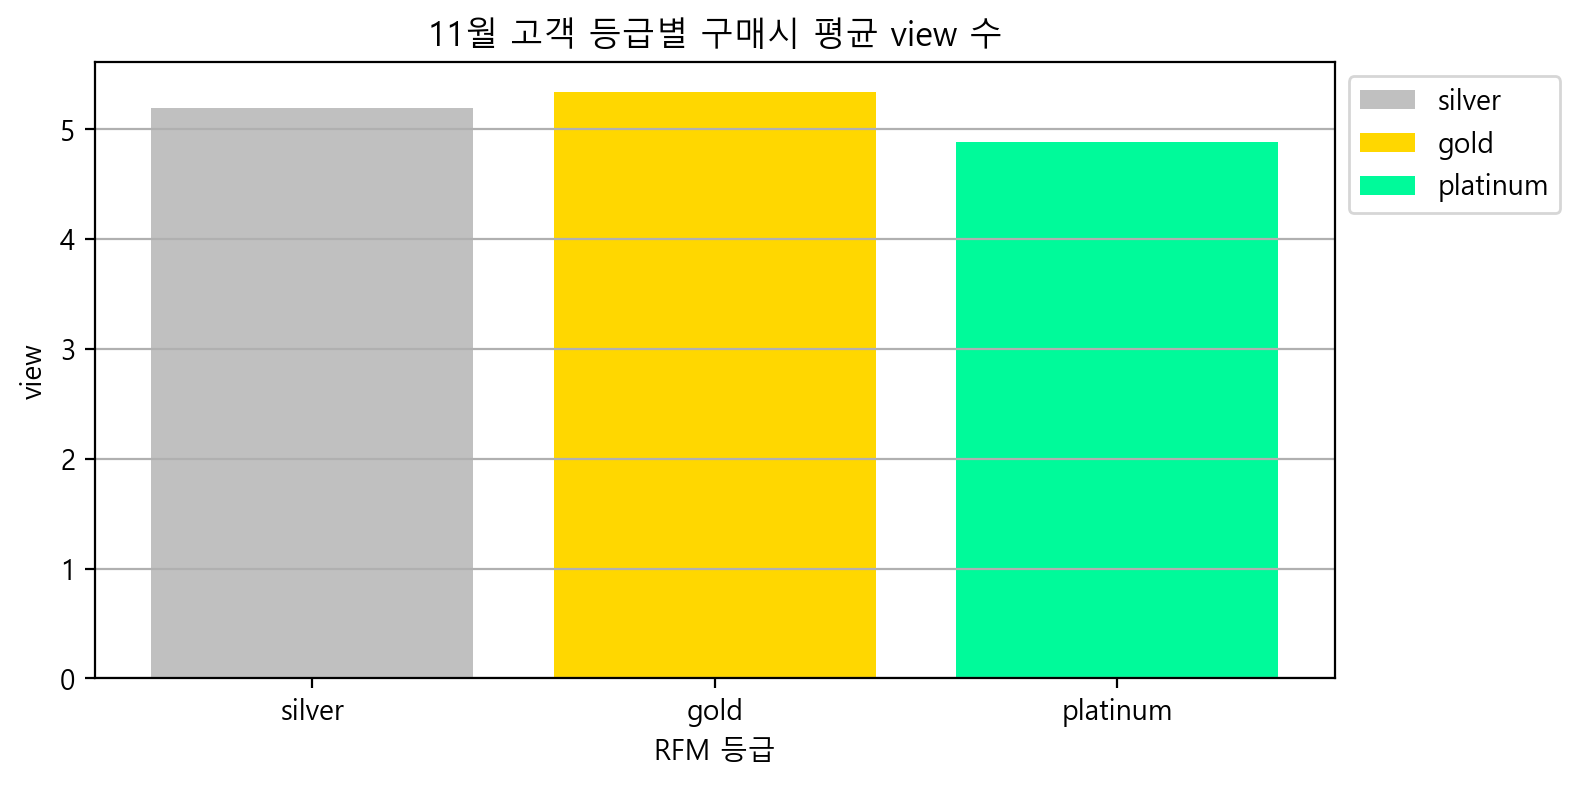

In [55]:
# view만 시각화
plt.figure(figsize=(8, 4))
x = ['silver', 'gold', 'platinum']
y = [silver_mean[0], gold_mean[0], platinum_mean[0]]
plt.bar(x, y, color = ['silver', 'gold', 'mediumspringgreen'], label=x)

plt.xlabel("RFM 등급")
plt.ylabel("view")
plt.grid(True, axis='y')
plt.legend(bbox_to_anchor=(1, 1))
plt.title('11월 고객 등급별 구매시 평균 view 수')